<a href="https://colab.research.google.com/github/saswata121924/Predict_House_Prices/blob/main/Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

## **Introduction**

Welcome to Boston Massachusetts in the 1970s! We are working for a real estate development company and we want to value any residential project before they start. We are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [2]:
#Import all necessary modules required
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [4]:
data = pd.read_csv('boston.csv', index_col=0)
print(f"No. of rows and columns {data.shape}")
data.info()

No. of rows and columns (506, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


## Data Cleaning - Check for Missing Values and Duplicates

In [5]:
data.isna().values.any()

False

In [6]:
print(f"Are there any duplicates: {data.duplicated().any()}")

Are there any duplicates: False


In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [8]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


## Descriptive Statistics

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [10]:
print(f"Students per Teacher average is 18.46")

Students per Teacher average is 18.46


In [11]:
print(f"Average price(in $1000) of a room is $22.53")

Average price(in $1000) of a room is $22.53


In [12]:
print("The minimum average number of rooms is 3.56")
print("The maximum average number of rooms is 8.78")

The minimum average number of rooms is 3.56
The maximum average number of rooms is 8.78


## Visualise the Features

Text(0.5, 9.444444444444438, 'Price in $1000s')

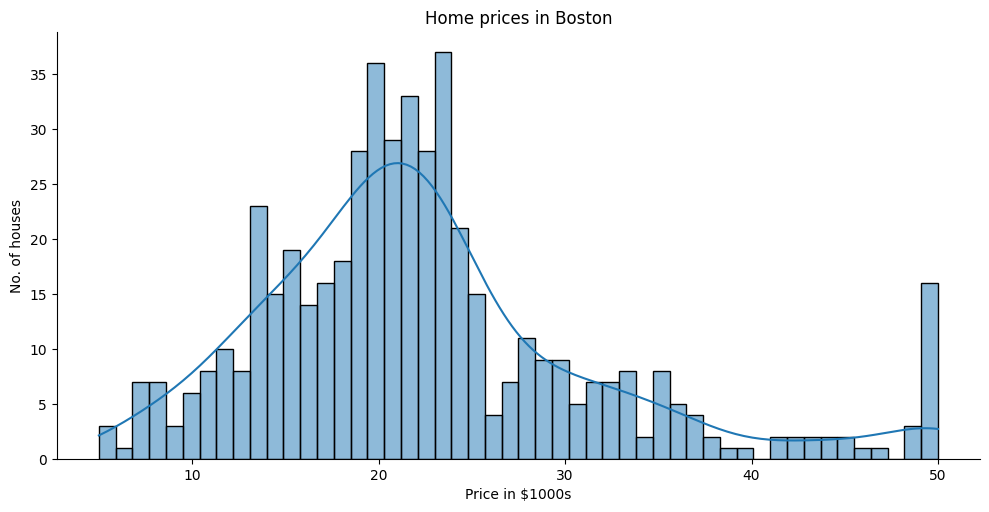

In [13]:
sns.displot(x=data.PRICE,
            bins=50,
            aspect=2,
            kde=True
            )
plt.title("Home prices in Boston")
plt.ylabel("No. of houses")
plt.xlabel("Price in $1000s")

Text(0.5, 9.444444444444438, 'Average number of Rooms')

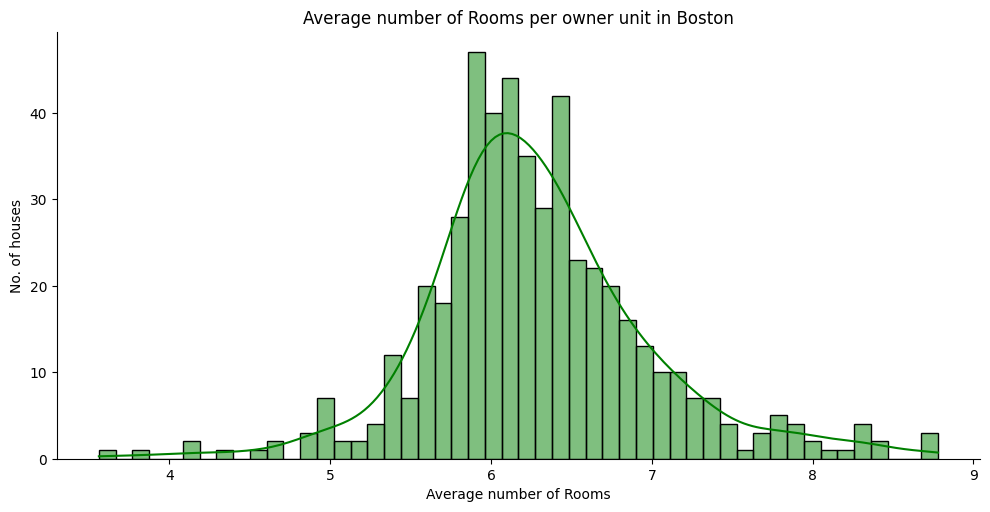

In [14]:
sns.displot(x=data.RM,
            bins=50,
            aspect=2,
            kde=True,
            color="green"
            )
plt.title("Average number of Rooms per owner unit in Boston")
plt.ylabel("No. of houses")
plt.xlabel("Average number of Rooms")

Text(0.5, 9.444444444444438, 'Weighted Distances to five Boston Employment Centres')

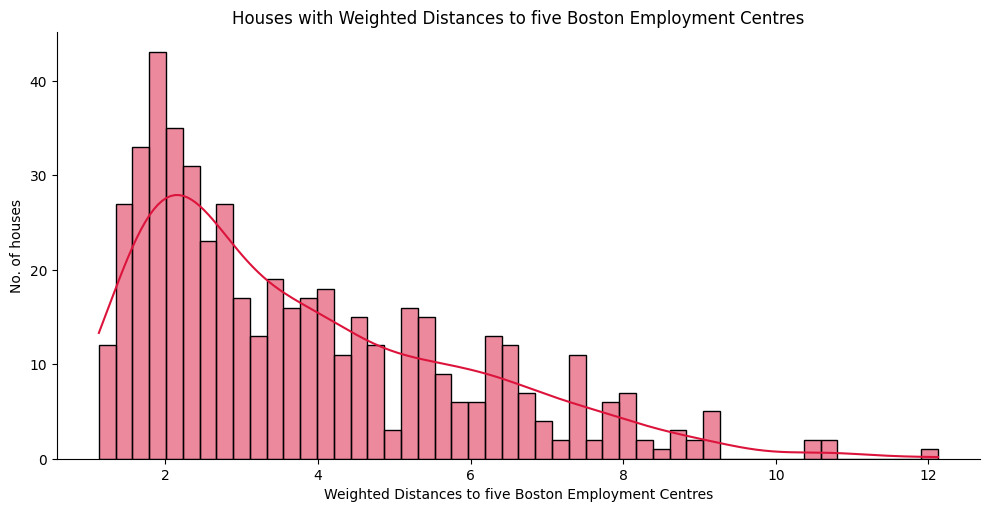

In [15]:
sns.displot(x=data.DIS,
            bins=50,
            aspect=2,
            kde=True,
            color="crimson"
            )
plt.title("Houses with Weighted Distances to five Boston Employment Centres")
plt.ylabel("No. of houses")
plt.xlabel("Weighted Distances to five Boston Employment Centres")

Text(0.5, 9.444444444444438, 'Accessibility to Radial Highways')

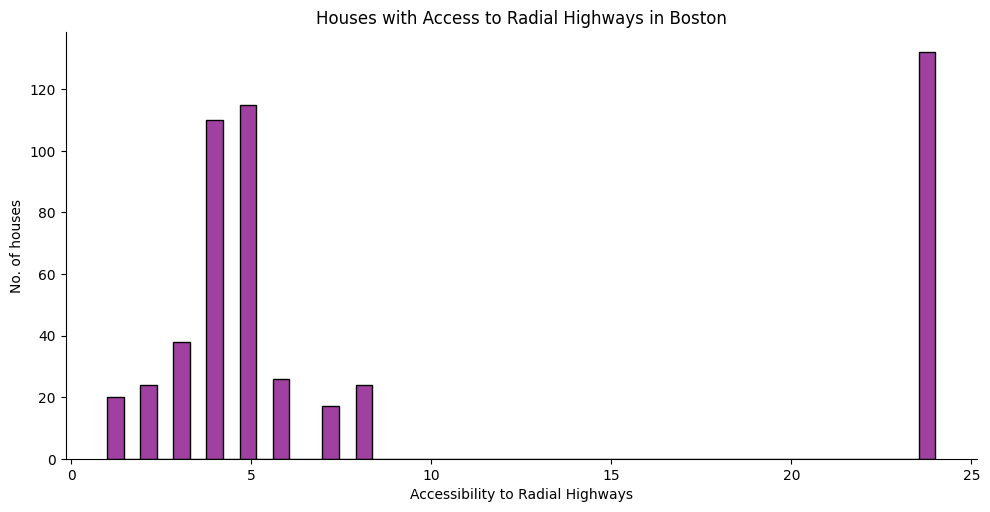

In [16]:
sns.displot(x=data.RAD,
            bins=50,
            aspect=2,
            color="purple"
            )
plt.title("Houses with Access to Radial Highways in Boston")
plt.ylabel("No. of houses")
plt.xlabel("Accessibility to Radial Highways")

#### Next to the River? ⛵️

In [17]:
river_access = data['CHAS'].value_counts()
px.bar(river_access,
       x=["No", "Yes"],
       y=river_access.values,
       color="CHAS",
       title="Next to Charles River?",
       color_continuous_scale="Haline"
      ).update_layout(yaxis_title="Number of Houses",
                      xaxis_title="Property Next to the river",
                      coloraxis_showscale=False
                      )

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

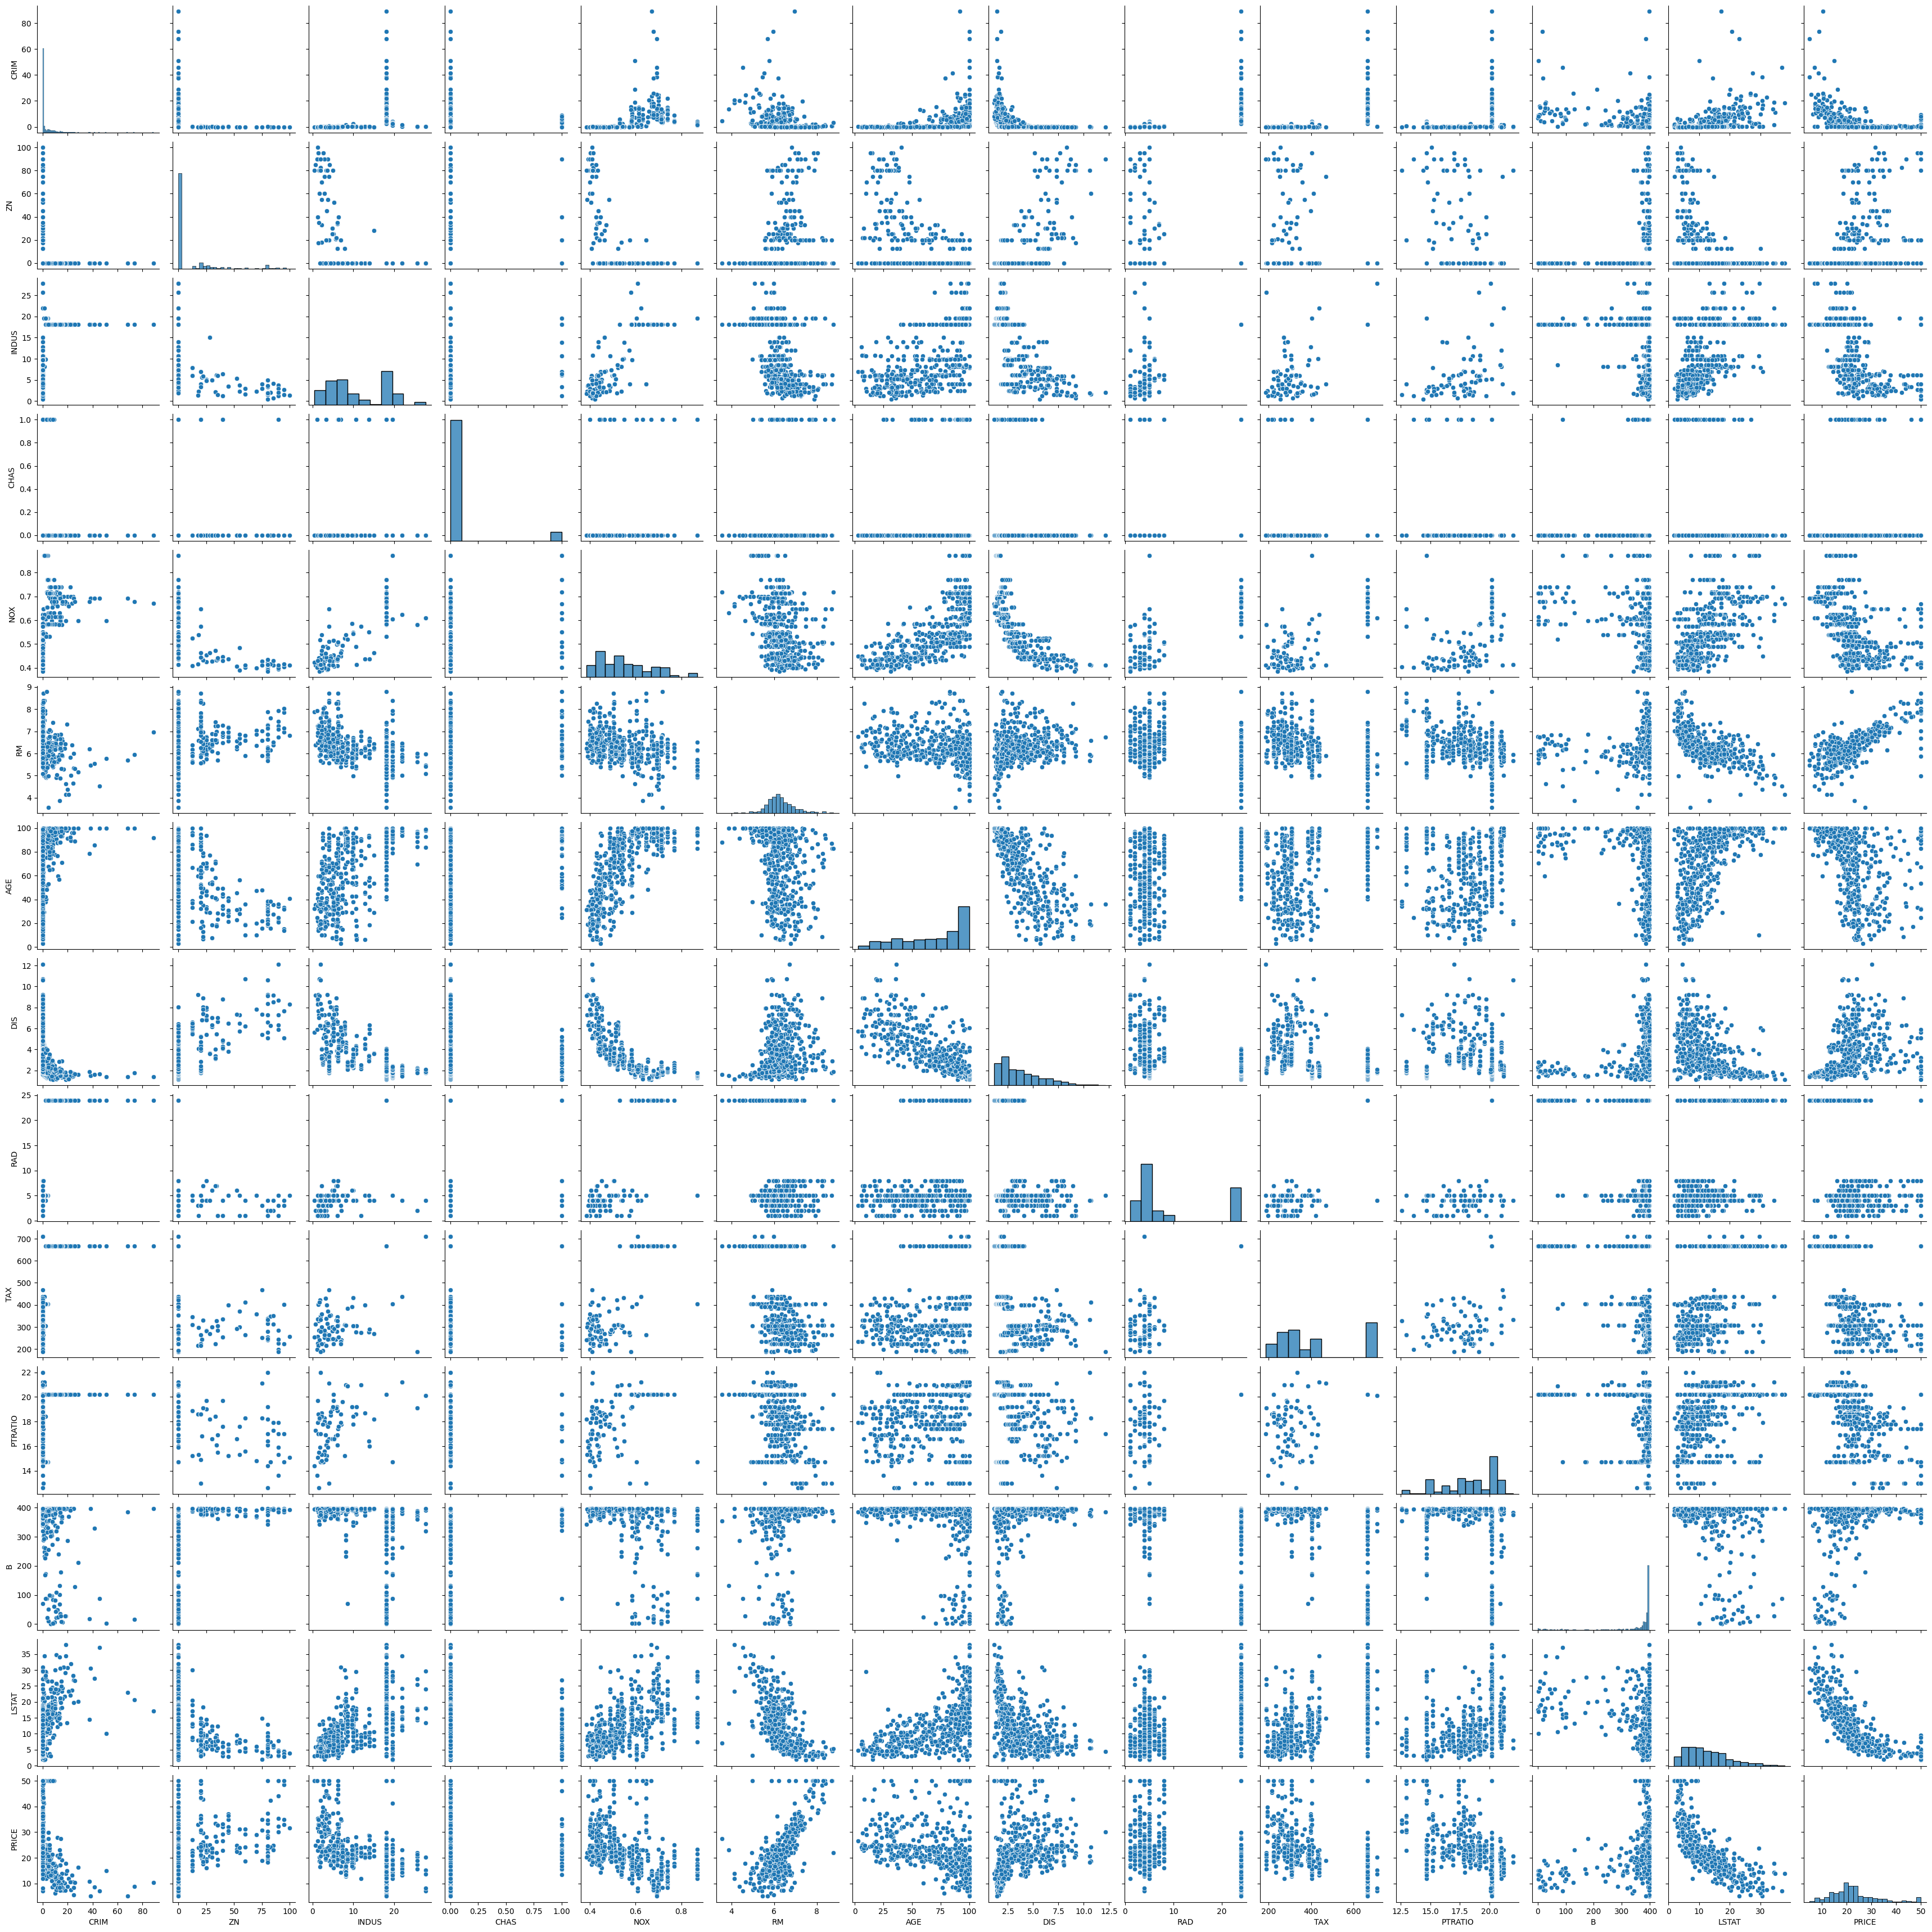

In [18]:
sns.pairplot(data)

#### Distance from Employment vs. Pollution

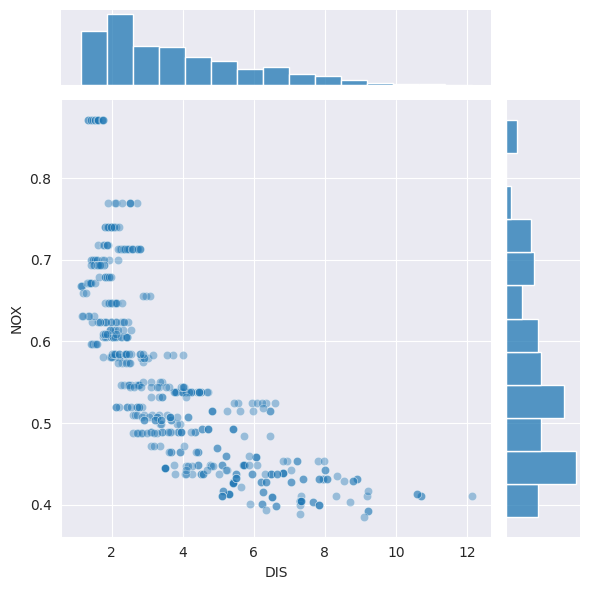

In [19]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x="DIS",
                y="NOX",
                joint_kws={'alpha':0.4}
                )

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution

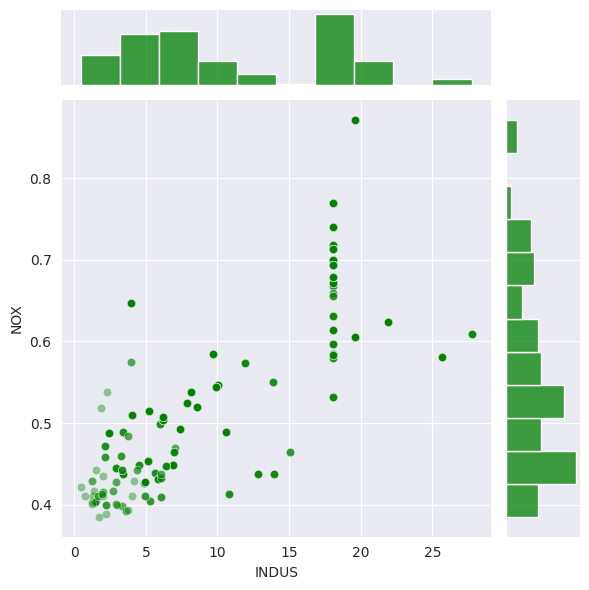

In [20]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x="INDUS",
                y="NOX",
                color="green",
                joint_kws={'alpha':0.4}
                )

#### % of Lower Income Population vs Average Number of Rooms

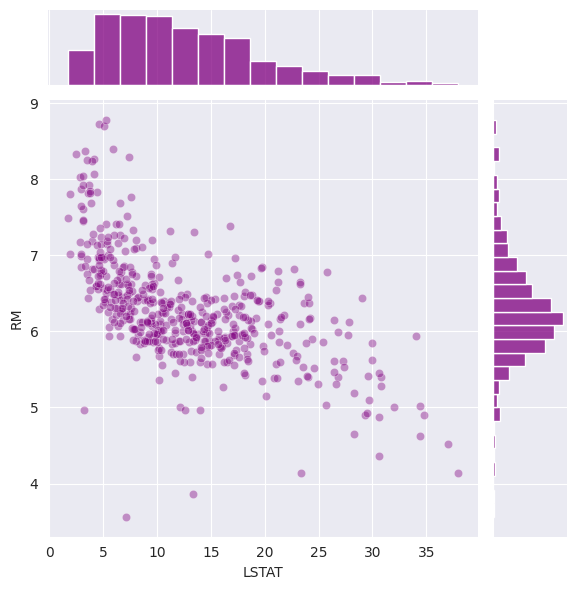

In [21]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x="LSTAT",
                y="RM",
                color="purple",
                joint_kws={'alpha':0.4}
                )

#### % of Lower Income Population versus Home Price

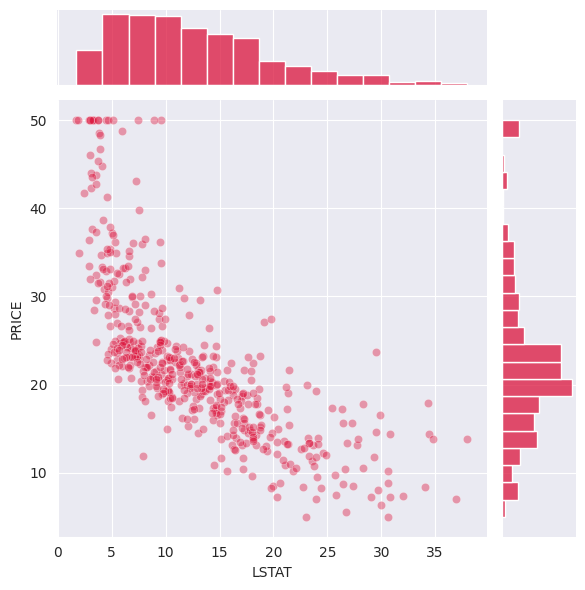

In [22]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x="LSTAT",
                y="PRICE",
                color="crimson",
                joint_kws={'alpha':0.4}
                )

#### Number of Rooms versus Home Value

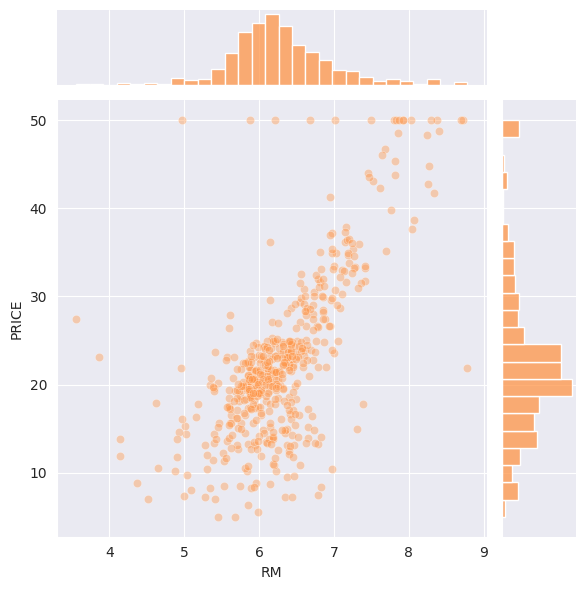

In [23]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data,
                x="RM",
                y="PRICE",
                color="#ff9547",
                joint_kws={'alpha':0.4}
                )

# Split Training & Test Dataset

In [24]:
target = data["PRICE"]
features = data.drop("PRICE", axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Multivariable Regression

Our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

In [25]:
rgr = LinearRegression()
rgr.fit(X_train, y_train)
r_squared = rgr.score(X_train, y_train)
print(f"Training data R-Squared valued: {r_squared:.2f}")

Training data R-Squared valued: 0.75


### Evaluate the Coefficients of the Model

In [26]:
rgr_coef = pd.DataFrame(data= rgr.coef_, index= X_train.columns, columns=["Coefficients"])
rgr_coef

,Coefficients
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


According to the model, what is the premium we would have to pay for an extra room?

In [27]:
premium = rgr_coef.loc["RM"][0]*1000
print(f"Price to be paid for having an extra room: {premium:.5}")

Price to be paid for having an extra room: 3108.5


### Analyse the Estimated Values & Regression Residuals

In [28]:
predicted_values = rgr.predict(X_train)
residuals = (y_train - predicted_values)

Text(0, 0.5, 'Predicted Price')

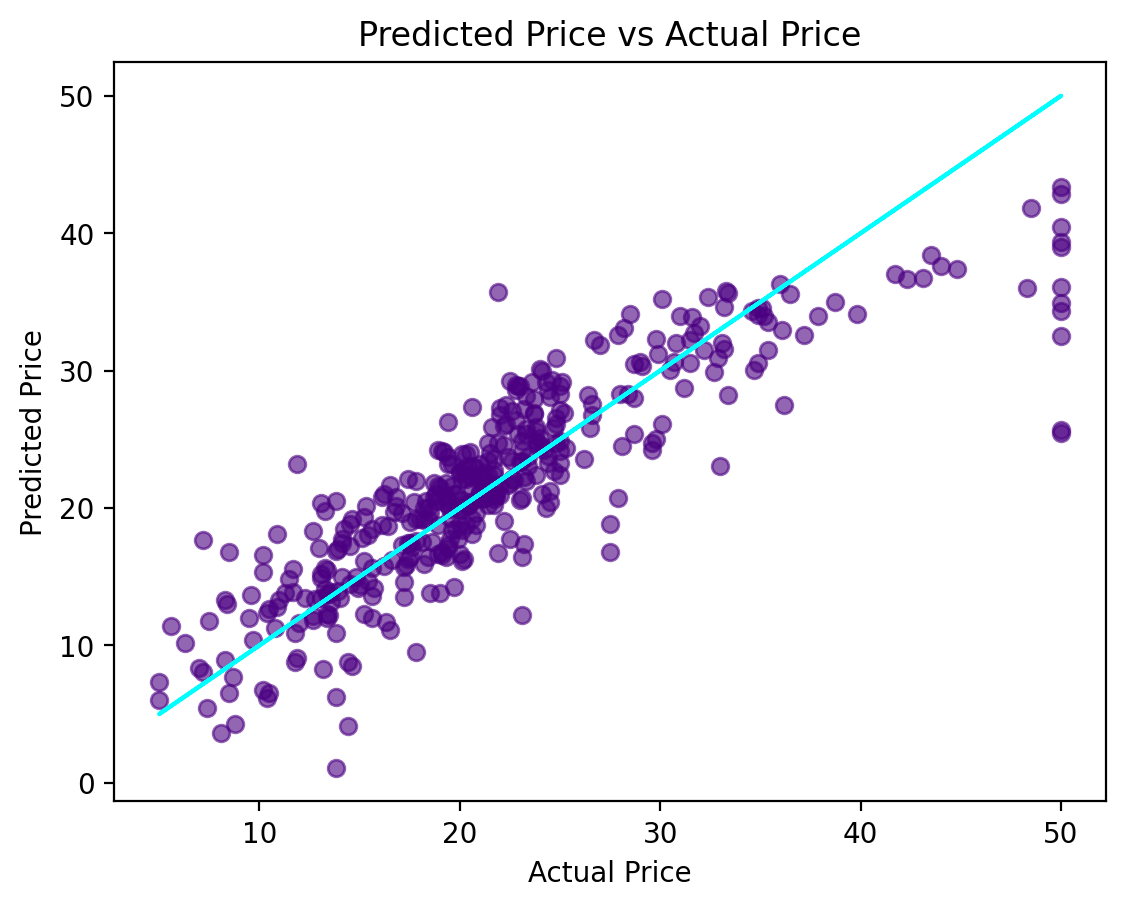

In [29]:
plt.figure(dpi=200)
plt.title("Predicted Price vs Actual Price")
plt.scatter(y_train, predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Residuals')

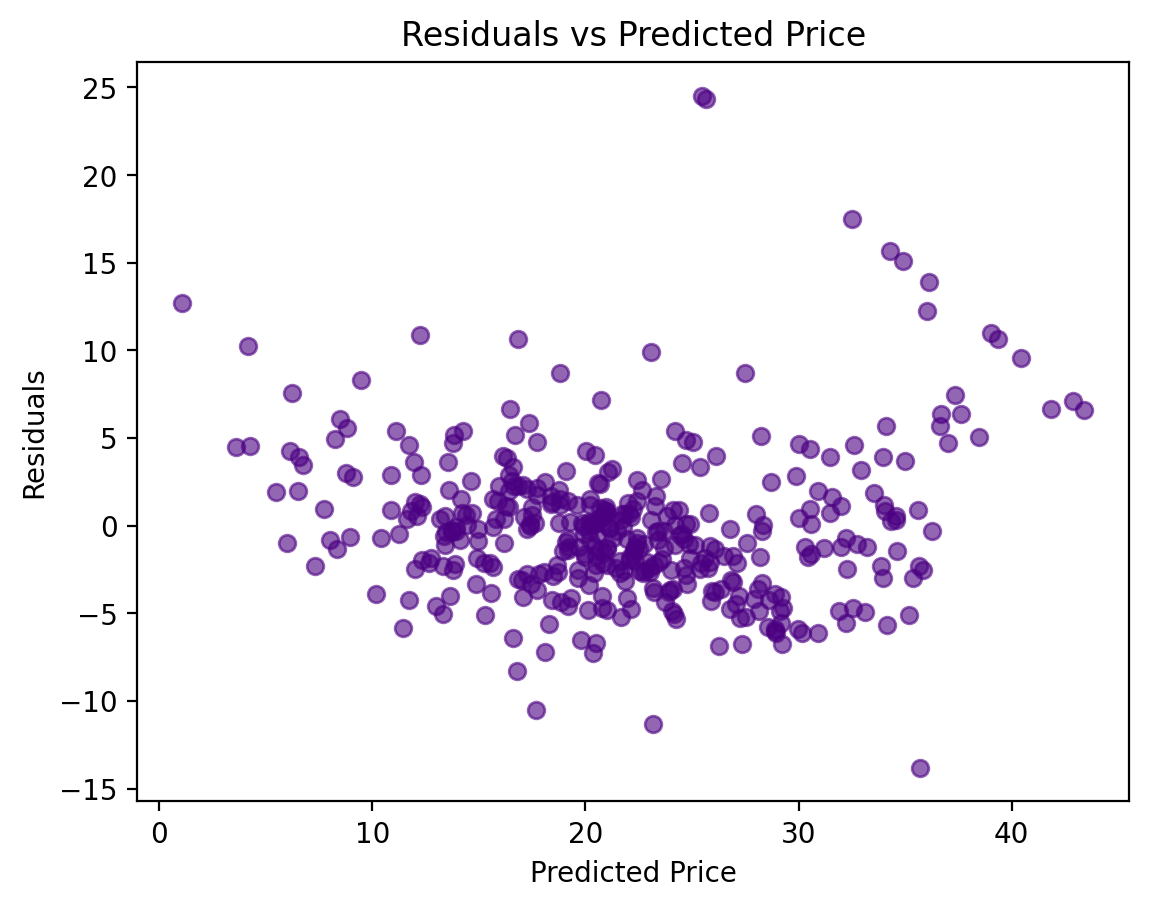

In [30]:
plt.figure(dpi=200)
plt.title("Residuals vs Predicted Price")
plt.scatter(predicted_values, residuals, c='indigo', alpha=0.6)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")

Text(0.5, 1.0, 'Residuals Skew (1.46) Mean (0.0)')

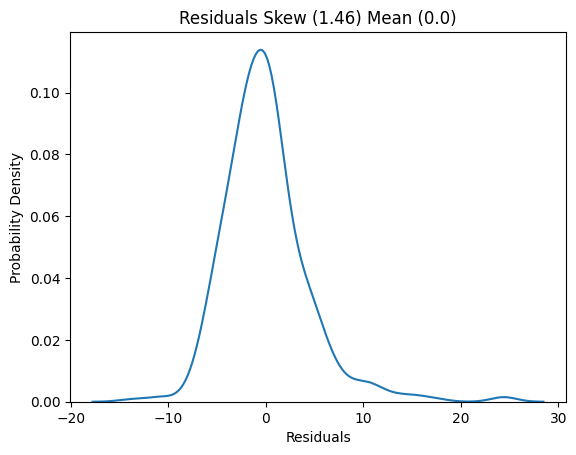

In [31]:
sns.kdeplot(x=residuals)
plt.xlabel("Residuals")
plt.ylabel("Probability Density")
plt.title(f'Residuals Skew ({round(residuals.skew(), 2)}) Mean ({round(residuals.mean(), 2)})')

In [32]:
print("The Residuals Skew is high")

The Residuals Skew is high


### Data Transformations for a Better Fit

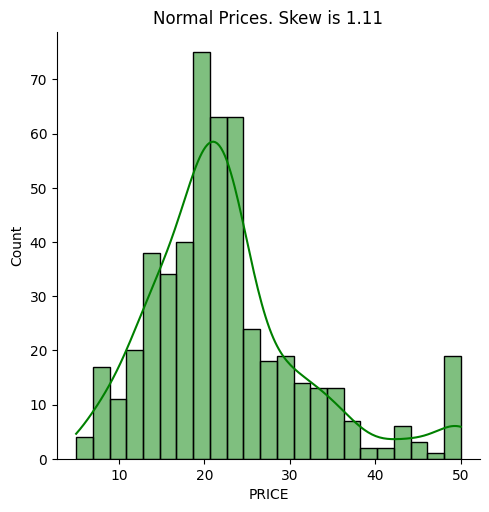

In [33]:
sns.displot(data['PRICE'], kde='kde', color='green')
plt.title(f"Normal Prices. Skew is {data['PRICE'].skew():.3}")
plt.show()

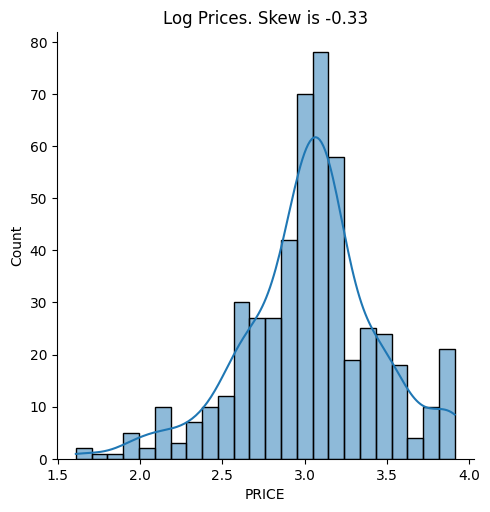

In [34]:
sns.displot(np.log(data['PRICE']), kde=True)
plt.title(f"Log Prices. Skew is {np.log(data['PRICE']).skew():.3}")
plt.show()

The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals.

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


In [35]:
log_y = np.log(data["PRICE"])
regr = LinearRegression()
X_train, X_test, log_y_train, log_y_test = train_test_split(features, log_y, test_size=0.2, random_state=10)
regr.fit(X_train, log_y_train)
r_squared = regr.score(X_train, log_y_train)
print(f"Training data R-Squared value after Log transformation: {r_squared:.2f}")

Training data R-Squared value after Log transformation: 0.79


In [36]:
log_predicted_values = regr.predict(X_train)
log_residuals = (log_y_train - log_predicted_values)

This time we got an r-squared of 0.79 compared to 0.75 which is a good improvement.

## Evaluating Coefficients with Log Prices

In [37]:
regr_coef = pd.DataFrame(data= regr.coef_, index= X_train.columns, columns=["Coefficients"])
regr_coef

,Coefficients
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


## Regression with Log Prices & Residual Plots

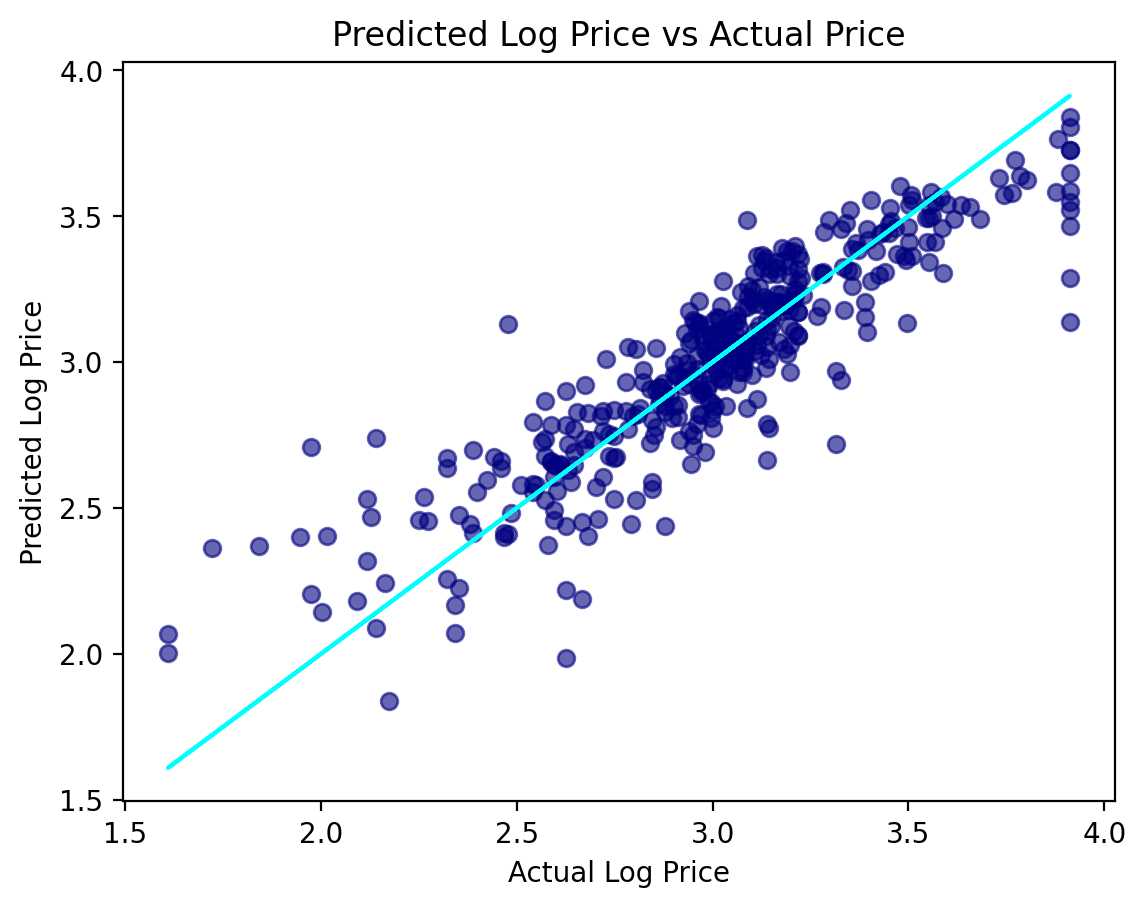

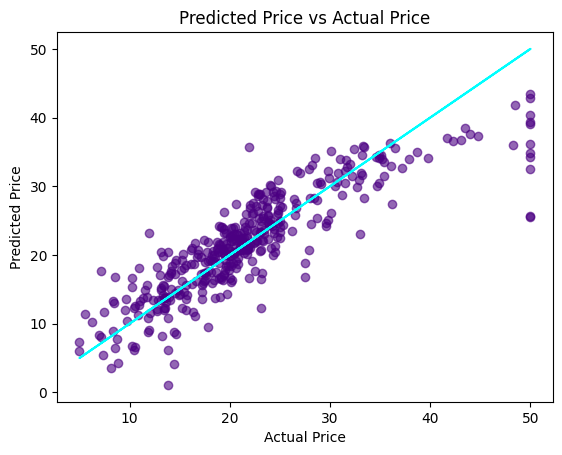

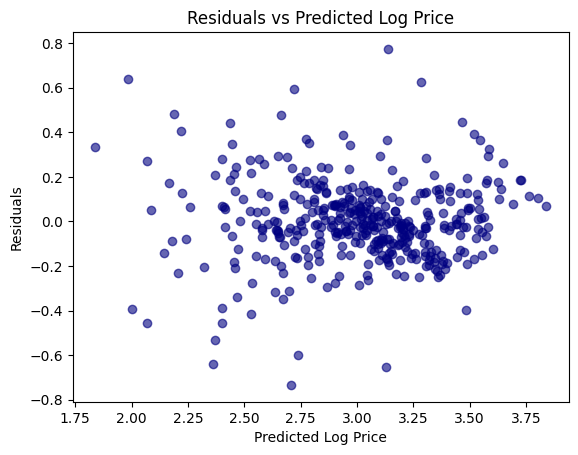

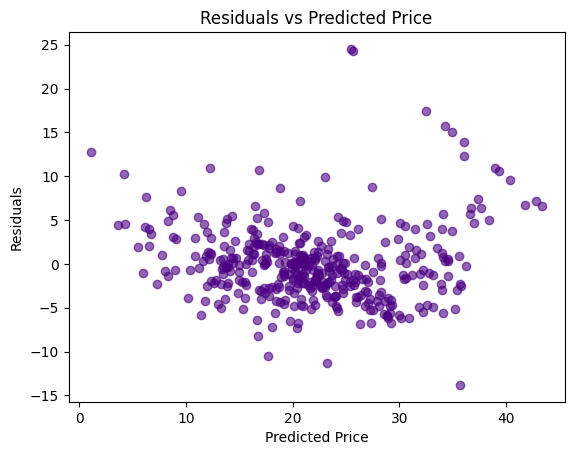

In [38]:
plt.figure(dpi=200)
plt.title("Predicted Log Price vs Actual Price")
plt.scatter(log_y_train, log_predicted_values, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.show()

plt.title("Predicted Price vs Actual Price")
plt.scatter(y_train, predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

plt.title("Residuals vs Predicted Log Price")
plt.scatter(log_predicted_values, log_residuals, c='navy', alpha=0.6)
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.show()

plt.title("Residuals vs Predicted Price")
plt.scatter(predicted_values, residuals, c='indigo', alpha=0.6)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

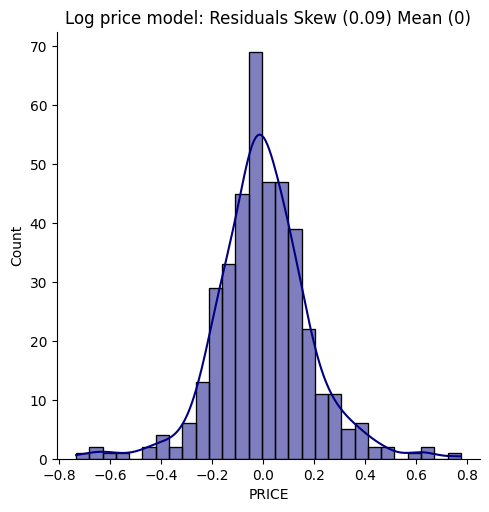

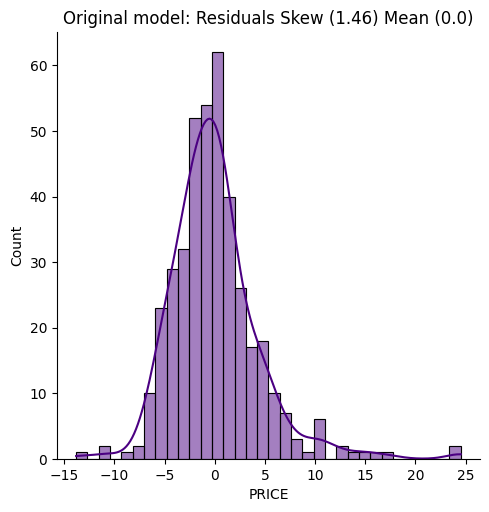

In [39]:
sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({round(log_residuals.skew(),2)}) Mean ({round(log_residuals.mean())})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({round(residuals.skew(),2)}) Mean ({round(residuals.mean(),2)})')
plt.show()

# Compare Out of Sample Performance

In [40]:
print(f'Original Model Test Data r-squared: {rgr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


In [46]:
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1,len(features.columns)), columns=features.columns)
display(property_stats)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [47]:
# Make prediction
log_estimate = regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20703.2


A property with an average value for all the features has a value of $20,700.